## Notes and Observations:

At some point, we'll need to make a new dataframe of *neighborhoods* to examine patterns in them. This first run is just exploration of the dataset, but the value comes from examining neighborhoods.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df1=pd.read_csv('nashville_20190813150235.csv', parse_dates = ['Most Recent Sale Date', 'Sale Date'], dtype={'Zone': str, 'Neighborhood': str})

C:\Users\alehe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## New DataFrame of Suburbs:

In [18]:
pca_results.cumsum()

,Explained Variance,Lot Size,Year Built,SqFt,Height,Price
Dimension 1,0.3482,-0.0266,0.5492,0.4744,0.6202,0.2966
Dimension 2,0.6066,0.6939,0.2032,0.9253,0.4426,0.6520
Dimension 3,0.7819,1.0685,0.3093,1.1615,0.6028,-0.2238
Dimension 4,0.9044,1.6314,0.8490,0.5518,0.5521,-0.0914


In [19]:
#Create new dataframe of aggregate values for each suburb
avgprice = pd.DataFrame(df.groupby('Neighborhood')['Sale Price'].agg(np.mean), columns=['Neighborhood','Sale Price'])
avgrooms = pd.DataFrame(df.groupby('Neighborhood')['Rooms'].agg(np.mean), columns=['Neighborhood','Rooms'])
avgfix = pd.DataFrame(df.groupby('Neighborhood')['Fixtures'].agg(np.mean), columns=['Neighborhood','Fixtures'])
avgyear = pd.DataFrame(df.groupby('Neighborhood')['Year Built'].agg(np.mean), columns=['Neighborhood','Year Built'])
avgsqft =pd.DataFrame(df.groupby('Neighborhood')['Square Footage Improved'].agg(np.mean), columns=['Neighborhood','Square Footage Improved'])
avgheight = pd.DataFrame(df.groupby('Neighborhood')['Story Height'].agg(np.mean), columns=['Neighborhood','Story Height'])
avglot= pd.DataFrame(df.groupby('Neighborhood')['Land Area Acres'].agg(np.mean), columns=['Neighborhood','Land Area Acres'])
nbhds=df['Neighborhood'].unique()
print(len(burbs))

819


In [26]:
nbdf= pd.DataFrame()
nbdf['Price']=avgprice['Sale Price']
nbdf['Height']= avgheight['Story Height']
nbdf['Lot Size']= avglot['Land Area Acres']
nbdf['Year Built']=avgyear['Year Built']
nbdf['SqFt']=avgsqft['Square Footage Improved']
nbdf['Fixtures']=avgfix['Fixtures']
#subdf['Suburb']=burbs
nbdf=nbdf.dropna()
print(nbdf.head())

                      Price    Height  Lot Size   Year Built         SqFt  \
Neighborhood                                                                
0126          437571.638095  1.919643  0.081619  1994.491758  1728.023810   
0226          214947.540636  1.420556  0.125053  1976.886667  1219.277385   
0326          278350.290323  1.734694  0.112419  1982.367347  1334.322581   
0725          271720.000000  1.000000  0.000000  1900.000000   743.000000   
0726          128500.000000  1.000000  0.000000  1959.000000   594.000000   

               Fixtures  
Neighborhood             
0126          11.498623  
0226           9.175556  
0326          10.775510  
0725           5.200000  
0726           5.000000  


In [27]:
nbdf.shape

(808, 6)

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
X= nbdf[['Lot Size','Year Built','SqFt','Height','Price', 'Fixtures']]
data = pd.DataFrame(scale(X), columns=['Lot Size','Year Built','SqFt','Height','Price', 'Fixtures'])

pca = PCA(n_components=4).fit(data)
pca_samples= pca.transform(data)
print(data.head())

   Lot Size  Year Built      SqFt    Height     Price  Fixtures
0 -0.209854    0.262217 -0.027743  0.861566  0.610606  0.646691
1 -0.138142   -0.617961 -0.654724 -0.296109 -0.421744 -0.197228
2 -0.159001   -0.343951 -0.512942  0.432561 -0.127734  0.384000
3 -0.344612   -4.461959 -1.241691 -1.271624 -0.158480 -1.641461
4 -0.344612   -1.512216 -1.425320 -1.271624 -0.822618 -1.714117


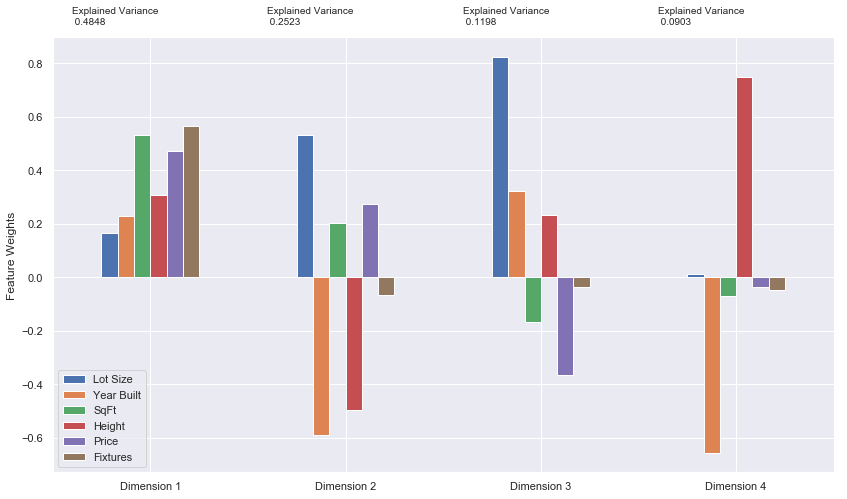

In [31]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [41]:
pca_results.cumsum()

,Explained Variance,Lot Size,Year Built,SqFt,Height,Price,Fixtures
Dimension 1,0.4848,0.1671,0.2294,0.5321,0.3079,0.4714,0.5651
Dimension 2,0.7371,0.6989,-0.3615,0.7343,-0.1902,0.7451,0.5004
Dimension 3,0.8569,1.5225,-0.0398,0.5651,0.0423,0.3787,0.4646
Dimension 4,0.9472,1.5345,-0.6958,0.4949,0.7912,0.3423,0.4156


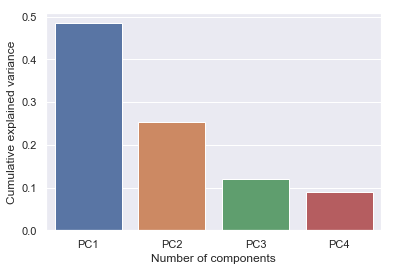

In [33]:
dfvar = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",  
           data=dfvar);
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [34]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [35]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

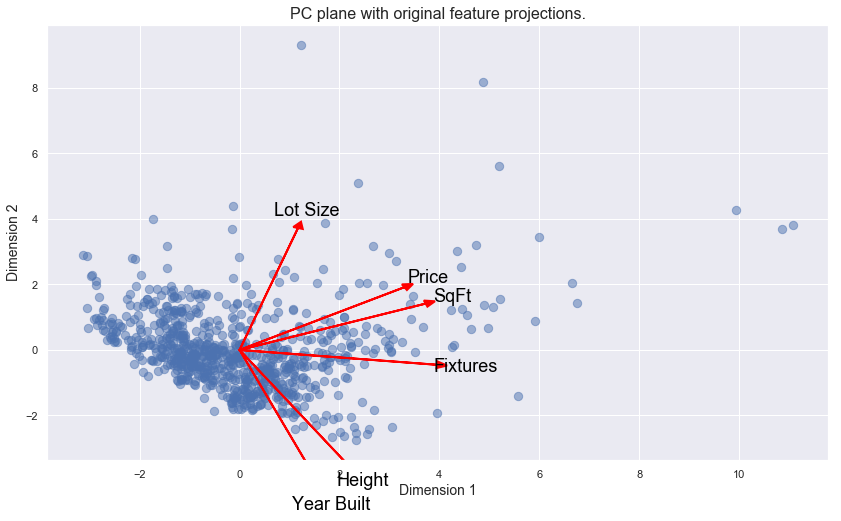

In [36]:
biplot(data, reduced_data, pca)

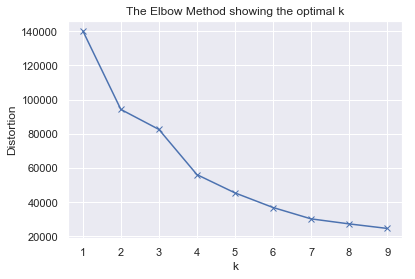

In [37]:
#Determine k using elbow method
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

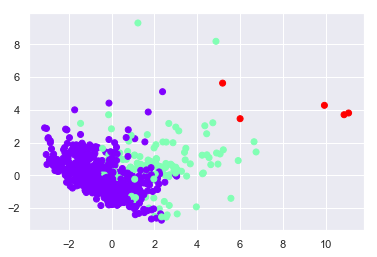

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
data['cluster'] = pd.Series(labels)

plt.scatter(reduced_data['Dimension 1'],reduced_data['Dimension 2'], c=kmeans.labels_, cmap='rainbow')

## Next step: analysis of neighborhoods
